In [59]:
import pandas as pd
import numpy as np 

import pingouin as pg
from pingouin import homoscedasticity
from scipy.stats import shapiro
import random
from random import sample
import seaborn as sns
import statsmodels.api as sm
from scipy import stats 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
MultiComparison)

In [5]:
df_1 =  pd.read_csv('5_task_1.csv')
df_2 = pd.read_csv('5_task_2.csv')

In [6]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [14]:
# проверки на гомогенность дисперсии внутри групп (в случае с df_1 - по A, B, C)

In [12]:
pg.homoscedasticity(data=df_1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [13]:
pg.homoscedasticity(data=df_2, dv="events", group="segment")

,W,pval,equal_var
levene,335.193107,9.423048e-75,False


In [15]:
# проверка на нормальность распределения (тест Шапиро-Уилка)

# ПЕРЕД этим - сэмплирование. 

# Сэмплирование нужно именно для проверки нормальности, сам тест уже проводится на исходных данных!

In [29]:
random_sample_a = df_1[df_1.group == 'A'].events.sample(1000, random_state=17)
random_sample_b = df_1[df_1.group == 'B'].events.sample(1000, random_state=17)
random_sample_c = df_1[df_1.group == 'C'].events.sample(1000, random_state=17)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


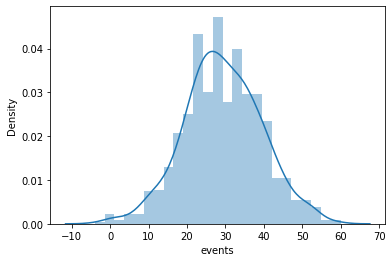

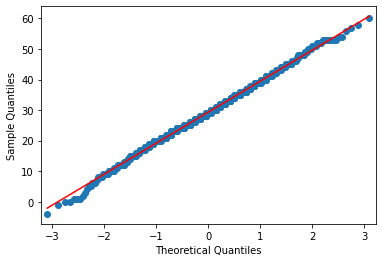

In [40]:
sns.distplot(random_sample_a);
sm.qqplot(random_sample_a, line='r');

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


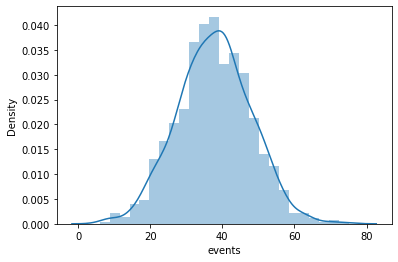

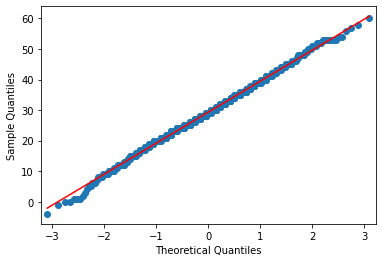

In [41]:
sns.distplot(random_sample_b);
sm.qqplot(random_sample_a, line='r');

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


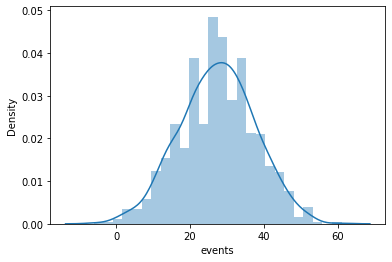

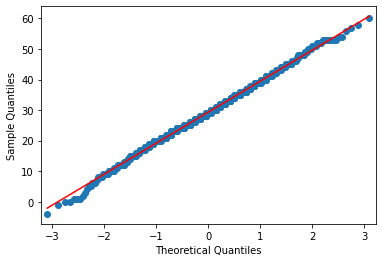

In [42]:
sns.distplot(random_sample_c);
sm.qqplot(random_sample_a, line='r');

In [43]:
# qq-plot гораздо нагляднее показывает, нормальное ли распределение
# на distplot'е кажется, что распеределение не совсем нормальное

In [38]:
print(shapiro(random_sample_a))
print(shapiro(random_sample_b))
print(shapiro(random_sample_c))

# но тест Шапиро показывается, что всё же распределение во всех группах нормальное

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)
ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)
ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)


In [ ]:
# попробуем сделать то же самое, только без сэмплирования

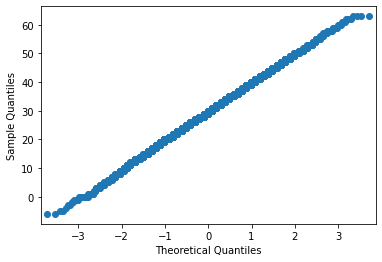

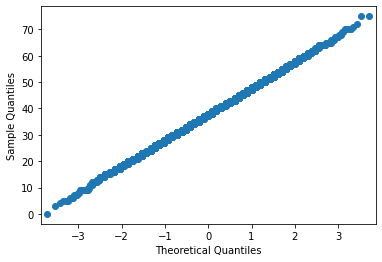

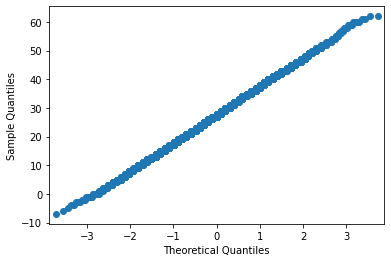

In [47]:
sm.qqplot(df_1[df_1.group == 'A'].events);
sm.qqplot(df_1[df_1.group == 'B'].events);
sm.qqplot(df_1[df_1.group == 'C'].events);

In [44]:
print(shapiro(df_1[df_1.group == 'A'].events))
print(shapiro(df_1[df_1.group == 'B'].events))
print(shapiro(df_1[df_1.group == 'C'].events))

ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)
ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)
ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# мы видим, что p-value становится гораздо меньше 

In [49]:
# проведём тест

In [56]:
group_a = df_1.query('group == "A"').events
group_b = df_1.query('group == "B"').events
group_c = df_1.query('group == "C"').events

In [57]:
stats.f_oneway(group_a, group_b, group_c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [58]:
# Критерий Тьюки для того, чтобы понять, между КАКИМИ группами есть различие

In [61]:
print(pairwise_tukeyhsd(df_1.events, df_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [62]:
# попробуем, то же самое, но через pingouin

In [63]:
pg.pairwise_tukey(data=df_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [64]:
# p-значение то же самое

# Получается, статистически значимая между разрешением показанных картинок имеется

In [ ]:
# визуализируйте распределение events для контрольной и тестовой групп.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


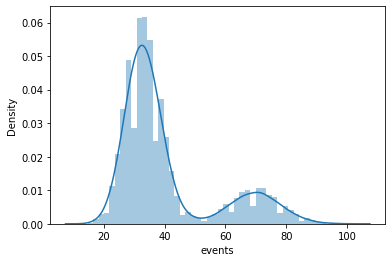

In [71]:
sns.distplot(df_2[df_2.group == 'test'].events);

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


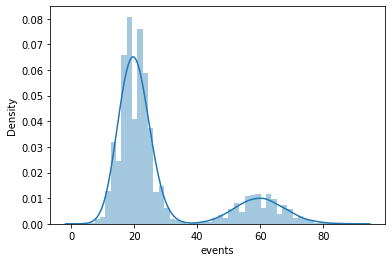

In [72]:
sns.distplot(df_2[df_2.group == 'control'].events);

In [77]:
# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя

In [82]:
df_2.groupby(['group', 'segment'], as_index=False) \
    .agg({'events': ['mean', 'median', 'std']})

group segment     events                 
                         mean median       std
0  control    high  59.970800   60.0  7.805347
1  control     low  20.031575   20.0  4.473576
2     test    high  69.938500   70.0  8.403974
3     test     low  33.025925   33.0  5.720845

In [ ]:
# Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, 
# чтобы понять между какими группами есть статистически значимые различия.

In [89]:
df_2['combination'] = df_2['group'] + '/' + df_2['segment']
df_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [85]:
pg.anova(data=df_2, dv='events', between=['group', 'segment'])

# факторы group, segment и их взаимодействие оказались значимыми

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [91]:
print(pairwise_tukeyhsd(df_2.events, df_2.combination))

# везде нулевые гипотезы отвергаются => все средние групп различаются статистически

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


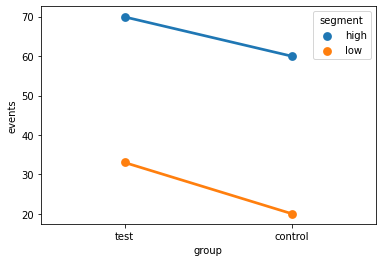

In [94]:
sns.pointplot(data=df_2, x='group', y='events', hue='segment');